<a href="https://colab.research.google.com/github/SusanSagwa/Energy-Consumption-Prediction-In-Smart-Buildings-Using-Ensemble-Learning/blob/main/Energy_Consumption_Prediction_using_ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Appliances Energy Consumption Prediction

#### In this project we will be analysing the appliance usage in the house gathered via home sensors. All readings are taken at 10 mins intervals for 4.5 months . The goal is to predict energy consumption by appliances .
#### In this case regression analysis and will be used to predict Appliance energy usage based on data collected from various sensors. 

### Problem Statement
#### We should predict Appliance energy consumption for a house based on factors like temperature, humidity & pressure . In order to achieve this, we need to develop a supervised learning models using regression algorithms. Regression algorithms are used as data consist of continuous features and there are no identification of appliances in dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### READING THE DATA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/drive/MyDrive/energydata_complete.csv', parse_dates=['date'])

In [4]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


There are 29 features to describe appliances energy use :
1. date : time year-month-day hour:minute:second
2. lights : energy use of light fixtures in the house in Wh
3. T1 : Temperature in kitchen area, in Celsius
4. T2 : Temperature in living room area, in Celsius
5. T3 : Temperature in laundry room area
6. T4 : Temperature in office room, in Celsius
7. T5 : Temperature in bathroom, in Celsius
8. T6 : Temperature outside the building (north side), in Celsius
9. T7 : Temperature in ironing room, in Celsius
10. T8 : Temperature in teenager room 2, in Celsius
11. T9 : Temperature in parents’ room, in Celsius
12. T_out : Temperature outside (from Chievres weather station), in Celsius
13. Tdewpoint : (from Chievres weather station), Â°C
14. RH_1 : Humidity in kitchen area, in %
15. RH_2 : Humidity in living room area, in %
16. RH_3 : Humidity in laundry room area, in %
17. RH_4 : Humidity in office room, in %
18. RH_5 : Humidity in bathroom, in %
19. RH_6 : Humidity outside the building (north side), in %
20. RH_7 : Humidity in ironing room, in %
21. RH_8 : Humidity in teenager room 2, in %
22. RH_9 : Humidity in parents’ room, in %
23. RH_out :Humidity outside (from Chievres weather station), in %
24. Pressure : (from Chievres weather station), in mm Hg
25. Wind speed: (from Chievres weather station), in m/s
26. Visibility :(from Chievres weather station), in km
27. Rv1 :Random variable 1, non-dimensional
28. Rv2 :Random variable 2, non-dimensional
29. Appliances : Total energy used by appliances, in Wh

#### set all variable names in lower case

In [5]:
df.columns = [x.lower() for x in df.columns]

In [6]:
df = df.set_index('date')

In [7]:
df.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
df.shape

(19735, 28)

# DATA STRUCTURE

In [9]:
df.isnull().sum()

appliances     0
lights         0
t1             0
rh_1           0
t2             0
rh_2           0
t3             0
rh_3           0
t4             0
rh_4           0
t5             0
rh_5           0
t6             0
rh_6           0
t7             0
rh_7           0
t8             0
rh_8           0
t9             0
rh_9           0
t_out          0
press_mm_hg    0
rh_out         0
windspeed      0
visibility     0
tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   t1           19735 non-null  float64
 3   rh_1         19735 non-null  float64
 4   t2           19735 non-null  float64
 5   rh_2         19735 non-null  float64
 6   t3           19735 non-null  float64
 7   rh_3         19735 non-null  float64
 8   t4           19735 non-null  float64
 9   rh_4         19735 non-null  float64
 10  t5           19735 non-null  float64
 11  rh_5         19735 non-null  float64
 12  t6           19735 non-null  float64
 13  rh_6         19735 non-null  float64
 14  t7           19735 non-null  float64
 15  rh_7         19735 non-null  float64
 16  t8           19735 non-null  float64
 17  rh_8         19735 non-null  float64
 18  t9         

In [11]:
df.describe()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


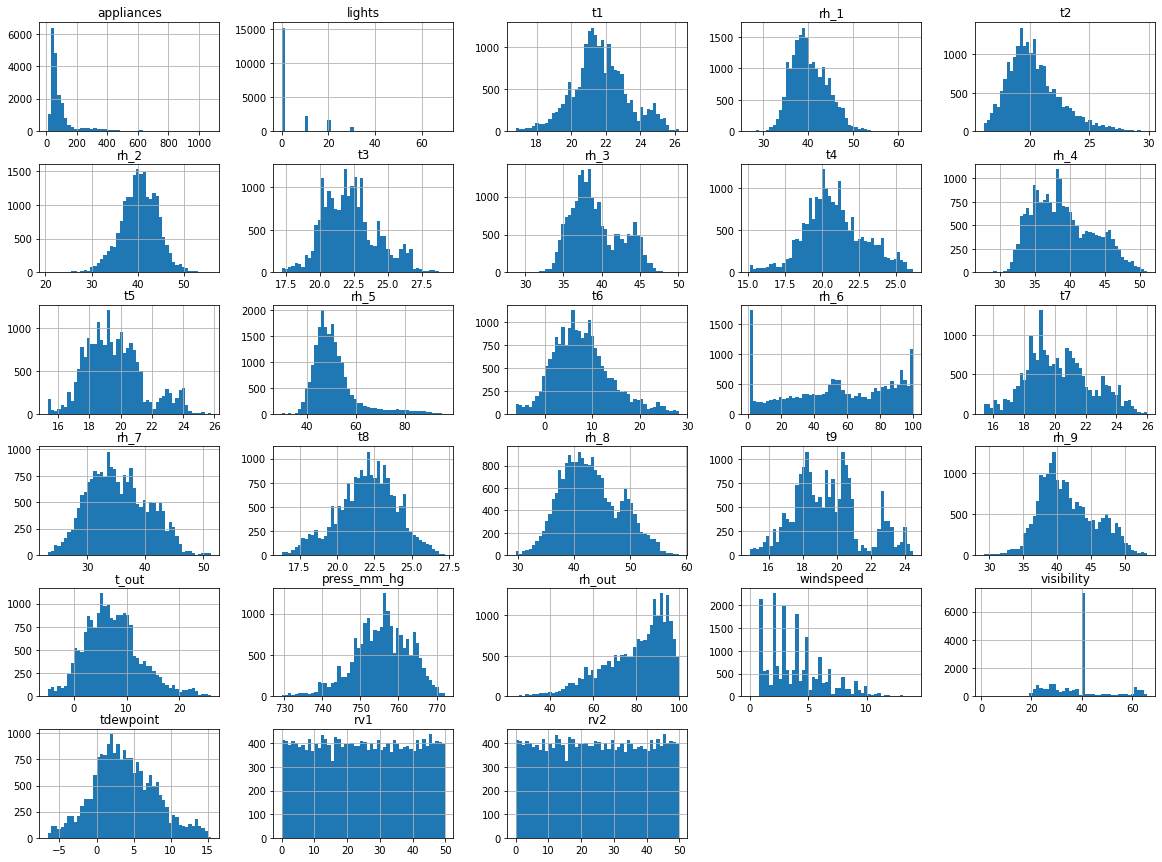

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.savefig("attribute_histogram_plots")
plt.show()

for appliances it skewed to the left.rv1 and rv2 are evenly distributed.rh_out is skewed to the right.press_mm_hg more or less skewed to the right.

In [13]:
df.corr()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
t1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
rh_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
t2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
rh_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
t3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
rh_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
t4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
rh_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [14]:
#sns.pairplot(df)

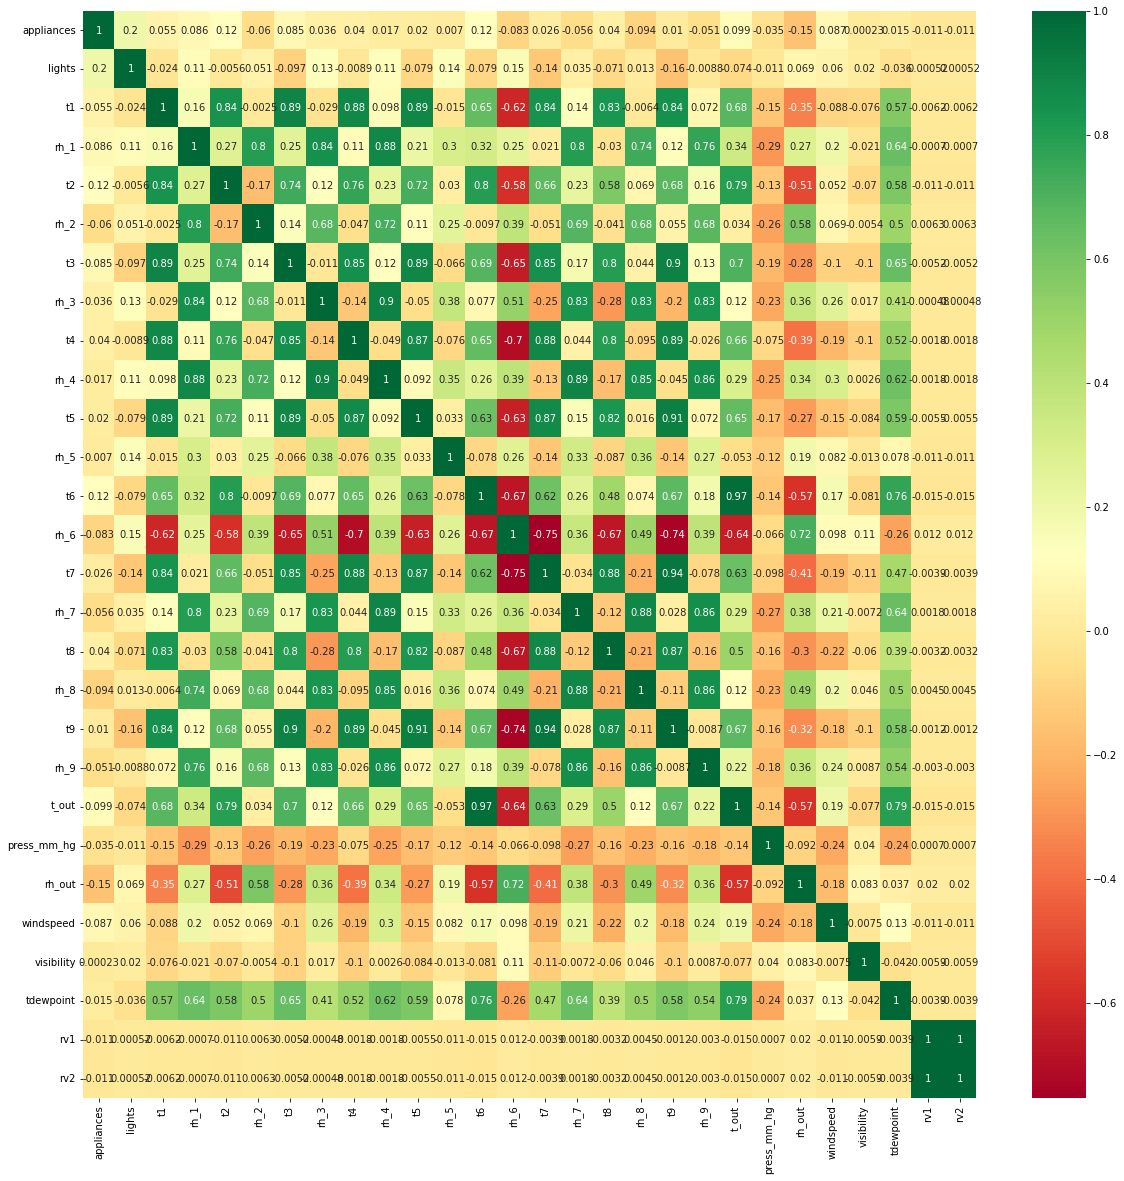

In [15]:
corrmap = df.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(20,20))
#making of heatmap
df_heatmap = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [16]:
sorted_appliances = df.sort_values('appliances', ascending=False)
sorted_appliances.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-16 18:50:00,1080,30,21.930000,42.766667,21.040000,38.080000,20.700000,40.633333,20.89,39.733333,...,17.79,40.672500,2.083333,765.033333,85.500000,3.666667,40.000000,-0.083333,27.408521,27.408521
2016-01-21 18:50:00,1070,30,19.600000,34.300000,18.426667,33.963333,18.390000,36.930000,17.70,35.400000,...,16.00,36.930000,-0.616667,764.533333,82.833333,1.000000,64.166667,-3.216667,11.735734,11.735734
2016-01-14 17:00:00,910,0,21.463333,41.693333,20.856667,38.363333,21.666667,43.930000,18.70,42.660000,...,17.00,43.466667,4.600000,747.900000,76.000000,7.000000,40.000000,0.700000,18.937972,18.937972
2016-04-04 15:40:00,900,0,23.000000,43.166667,22.200000,40.426667,26.100000,38.930000,21.60,41.526667,...,20.70,43.333333,14.766667,749.266667,59.666667,7.000000,40.000000,7.000000,15.105153,15.105153
2016-01-21 19:00:00,890,20,19.730000,37.863333,18.566667,34.090000,18.390000,36.863333,17.60,35.133333,...,16.00,36.730000,-0.800000,764.500000,84.000000,1.000000,64.000000,-3.200000,3.221583,3.221583


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


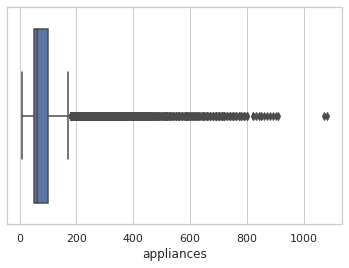

In [17]:
# boxplot appliances
sns.set(style="whitegrid")
ax = sns.boxplot(sorted_appliances.appliances)

In [18]:
df = df.dropna()
df = df.drop(df[(df.appliances>800)|(df.appliances<0)].index)

In [19]:
sorted_appliances = df.sort_values('appliances', ascending=False)
sorted_appliances.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-17 17:30:00,800,10,21.50,36.760000,20.100000,36.077273,20.790000,37.260000,21.000000,36.826667,...,18.1,37.260000,0.000000,764.850000,78.000000,2.000000,40.000000,-3.500000,31.552437,31.552437
2016-01-24 08:50:00,800,10,17.79,45.490000,17.133333,43.566667,18.596667,45.693333,18.493333,44.900000,...,15.5,48.590000,6.516667,767.466667,95.166667,5.333333,44.000000,5.750000,29.116347,29.116347
2016-04-16 10:40:00,800,0,22.10,41.700000,21.200000,41.790000,23.200000,38.260000,21.700000,40.090000,...,21.1,44.790000,10.433333,746.133333,78.333333,5.666667,27.333333,6.766667,34.999935,34.999935
2016-05-21 09:40:00,790,0,23.00,50.260000,25.530000,43.133333,24.390000,44.490000,23.600000,47.260000,...,23.0,47.462500,16.900000,756.333333,79.666667,4.666667,28.333333,13.333333,44.856357,44.856357
2016-04-04 12:20:00,790,0,22.39,45.563333,22.390000,42.966667,25.000000,41.433333,21.600000,43.590000,...,20.6,44.433333,13.466667,749.866667,68.666667,7.000000,40.000000,7.766667,4.089491,4.089491


In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
df['hour'] = df.index.hour
df['week'] = df.index.week
df['weekday'] = df.index.weekday
df['month'] = df.index.month

In [22]:
df['log_appliances'] = np.log(df.appliances)

In [23]:
list(df.columns)

['appliances',
 'lights',
 't1',
 'rh_1',
 't2',
 'rh_2',
 't3',
 'rh_3',
 't4',
 'rh_4',
 't5',
 'rh_5',
 't6',
 'rh_6',
 't7',
 'rh_7',
 't8',
 'rh_8',
 't9',
 'rh_9',
 't_out',
 'press_mm_hg',
 'rh_out',
 'windspeed',
 'visibility',
 'tdewpoint',
 'rv1',
 'rv2',
 'hour',
 'week',
 'weekday',
 'month',
 'log_appliances']

In [24]:
def daily(x,df=df):
    return df.groupby('weekday')[x].mean()
def hourly(x,df=df):
    return df.groupby('hour')[x].mean()

def monthly_daily(x,df=df):
    by_day = df.pivot_table(index='weekday', 
                                columns=['month'],
                                values=x,
                                aggfunc='mean')
    return round(by_day, ndigits=2)

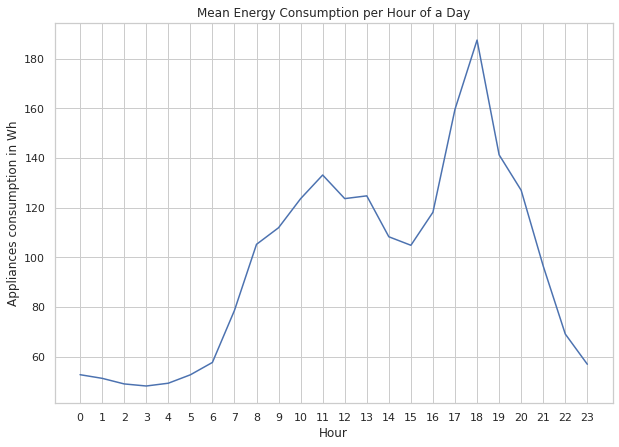

In [25]:
#plotting the hourly consumption

hourly('appliances').plot(figsize=(10,7))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks);

At night time ,energy consumption is low.The peak one is 18.So from 16 going to 18the energy consumption is peaking up.The reason for this may people are in home.They are watching tv using differnet electric gadgets and other appliances.

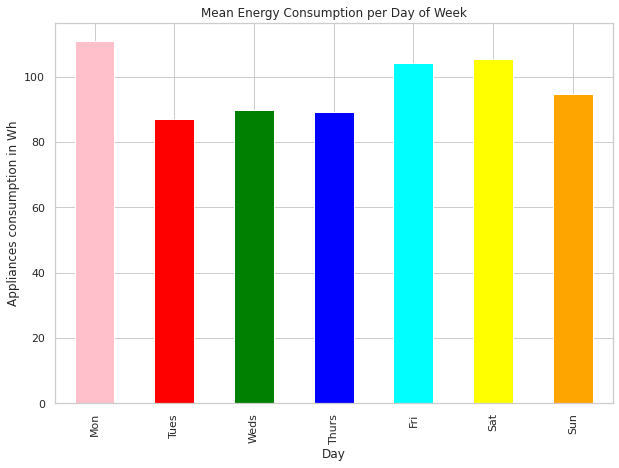

In [26]:
#Weekly Consumption

daily('appliances').plot(kind = 'bar', color=['pink', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange'], figsize=(10,7))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks, labels);

Based on the results,we have Tuesdays ,wednesdays ,thursdays and sundaysthe energy consumptions are not really high in variations.Mondays ,Fridays and saturdays they have  more or less  same energy consumption.

If we are going to take a differnt of all of these days we could not see any big varaition in energy consumption.

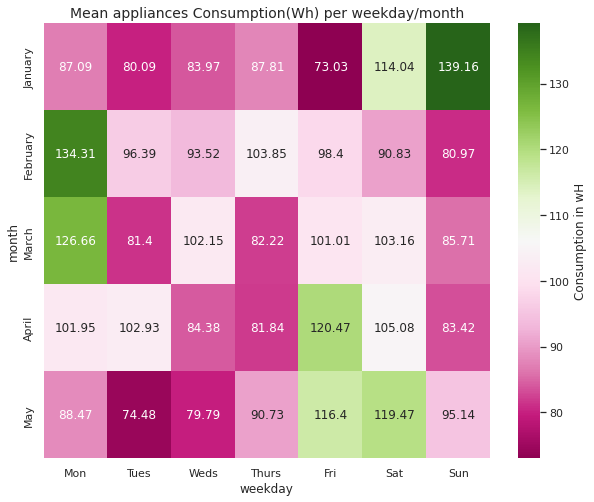

In [27]:
#MOntly Consumption
sns.set(rc={'figure.figsize':(10,8)},)
ax=sns.heatmap(monthly_daily('appliances').T,cmap="PiYG",
               xticklabels="Mon Tues Weds Thurs Fri Sat Sun".split(),
               yticklabels="January February March April May".split(),
               annot=True, fmt='g',
               cbar_kws={'label': 'Consumption in wH'}).set_title("Mean appliances Consumption(Wh) per weekday/month").set_fontsize('14')

plt.show()

As per the heat map tha most enegy consumption day for january is  sunday,For february and march it is Monday .For april its friday and for May most energy consumption day is saturday.

Text(0.5, 0, 'Appliances Log(wH)')

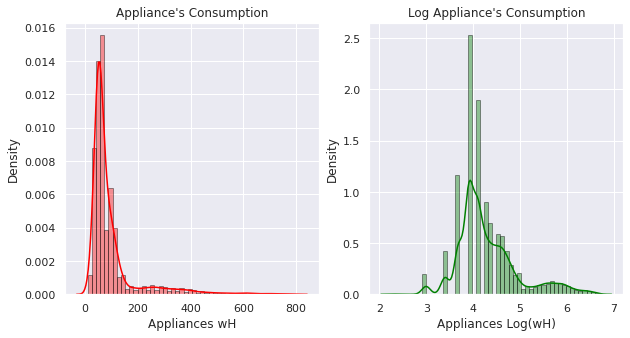

In [28]:
f, axes = plt.subplots(1, 2,figsize=(10,5))

sns.distplot(df.appliances, hist=True, color = 'red',hist_kws={'edgecolor':'black'},ax=axes[0])
axes[0].set_title("Appliance's Consumption")
axes[0].set_xlabel('Appliances wH')

sns.distplot(df.log_appliances, hist=True, color = 'green',hist_kws={'edgecolor':'black'},ax=axes[1])
axes[1].set_title("Log Appliance's Consumption")
axes[1].set_xlabel('Appliances Log(wH)')

From these histograms ,we can see our data raw data is very skewed .In comaprison to log transformation of data ,skewness is lessen  and distributionis more or less symetrical. 

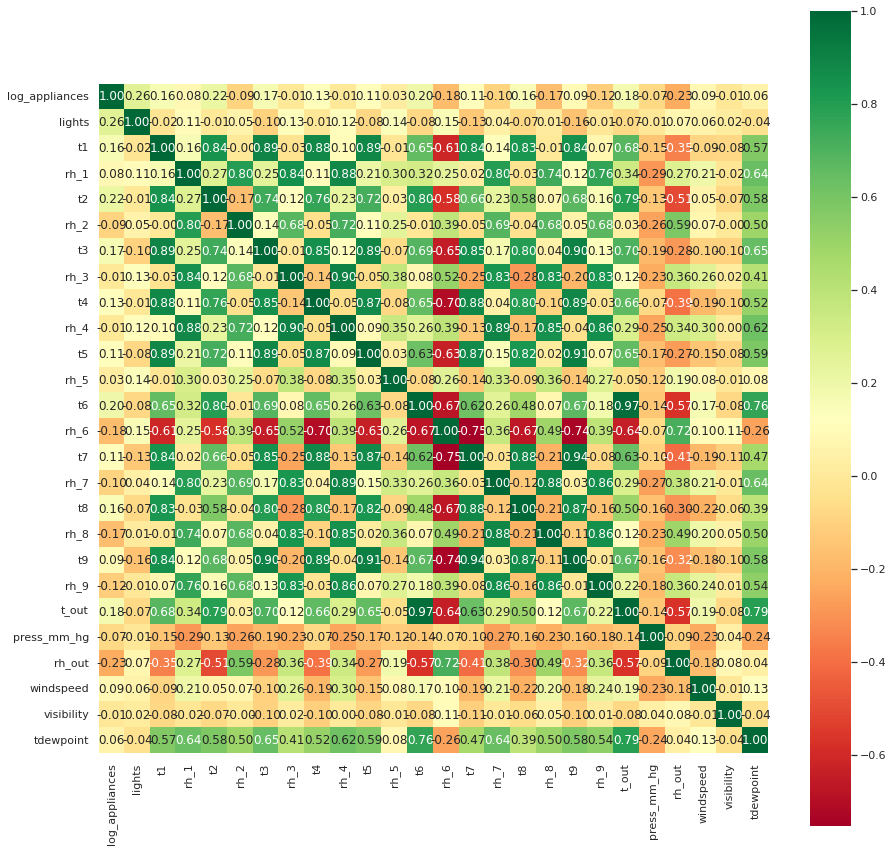

In [29]:
col = ['log_appliances', 'lights', 't1', 'rh_1', 't2', 'rh_2', 't3', 'rh_3', 't4',
       'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8', 'rh_8', 't9',
       'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed', 'visibility',
       'tdewpoint']
corr = df[col].corr()
plt.figure(figsize = (15,15))
sns.set(font_scale=1)
sns.heatmap(corr, cbar=True, annot=True, square = True, cmap='RdYlGn', fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

Here we'regoing to find which variables have high correlation with log_appliances.Also we can see here different correlations between and among them.lights,t2,t_out,t6 and hour have positive high correlation with log appliances.hour has the strongest postive correlation among all of the variables.rh_out has neagative high correlation with the log_appliances.

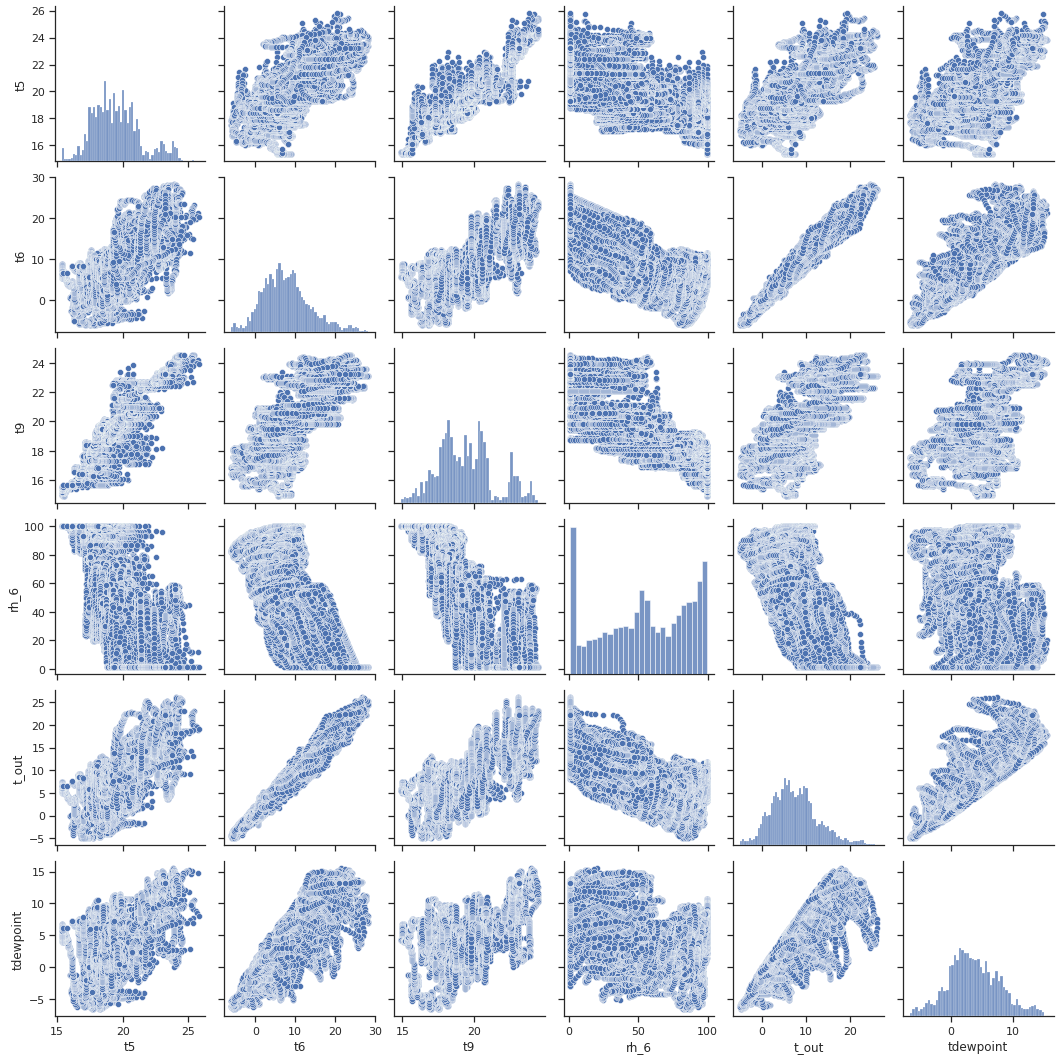

In [30]:
## lets check the linear independance of above highly correlated varaibles
col = ['t5','t6','t9', 'rh_6','t_out','tdewpoint']
sns.set(style="ticks", color_codes=True)
sns.pairplot(df[col])
plt.show();

two columns have a high degree of correlation with T9 -T5,T7 also T6 & T_Out has high correlation (both temperatures from outside) . Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.

# Training the Model

In [31]:
list(df.columns)


['appliances',
 'lights',
 't1',
 'rh_1',
 't2',
 'rh_2',
 't3',
 'rh_3',
 't4',
 'rh_4',
 't5',
 'rh_5',
 't6',
 'rh_6',
 't7',
 'rh_7',
 't8',
 'rh_8',
 't9',
 'rh_9',
 't_out',
 'press_mm_hg',
 'rh_out',
 'windspeed',
 'visibility',
 'tdewpoint',
 'rv1',
 'rv2',
 'hour',
 'week',
 'weekday',
 'month',
 'log_appliances']

Observations based on correlation plot
1. Temperature — All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances .  Four columns have a high degree of correlation with T9 — T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures from outside) . Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.
2. Weather attributes — Visibility, Tdewpoint, Press_mm_hg have low correlation values
3. Humidity — There are no significantly high correlation cases (> 0.9) for humidity sensors.
4. Random variables have no role to play
5. The random variables rv1, rv2 and Visibility, Tdewpoint, Press_mm_hg have low correlation with the target variable.
Due to above conclusions , I have dropped rv1, rv2, Visibility, T6,T9.
Number of Input Variables — 21 (reduced from 26)

In [32]:
df.log_appliances = df.log_appliances.astype(float)
Y =df['log_appliances']

In [33]:
Y

date
2016-01-11 17:00:00    4.094345
2016-01-11 17:10:00    4.094345
2016-01-11 17:20:00    3.912023
2016-01-11 17:30:00    3.912023
2016-01-11 17:40:00    4.094345
                         ...   
2016-05-27 17:20:00    4.605170
2016-05-27 17:30:00    4.499810
2016-05-27 17:40:00    5.598422
2016-05-27 17:50:00    6.040255
2016-05-27 18:00:00    6.063785
Name: log_appliances, Length: 19721, dtype: float64

In [34]:
# Due to conlusion made above below columns are removed
X =df.drop(df.loc[:,['rv1','rv2','visibility','t6','t9','appliances','log_appliances','hour','week','weekday','month']],axis=1)

In [35]:
X.head()

,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,...,t7,rh_7,t8,rh_8,rh_9,t_out,press_mm_hg,rh_out,windspeed,tdewpoint
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.200000,41.626667,18.2,48.900000,45.53,6.600000,733.5,92.0,7.000000,5.3
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.200000,41.560000,18.2,48.863333,45.56,6.483333,733.6,92.0,6.666667,5.2
2016-01-11 17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.200000,41.433333,18.2,48.730000,45.50,6.366667,733.7,92.0,6.333333,5.1
2016-01-11 17:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.133333,41.290000,18.1,48.590000,45.40,6.250000,733.8,92.0,6.000000,5.0
2016-01-11 17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.200000,41.230000,18.1,48.590000,45.40,6.133333,733.9,92.0,5.666667,4.9


In [36]:
Y.count()

19721

In [37]:
X.count()

lights         19721
t1             19721
rh_1           19721
t2             19721
rh_2           19721
t3             19721
rh_3           19721
t4             19721
rh_4           19721
t5             19721
rh_5           19721
rh_6           19721
t7             19721
rh_7           19721
t8             19721
rh_8           19721
rh_9           19721
t_out          19721
press_mm_hg    19721
rh_out         19721
windspeed      19721
tdewpoint      19721
dtype: int64

#### Spliting data to train, test

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42) 

In [39]:
y_test

date
2016-05-18 09:30:00    4.094345
2016-05-06 15:30:00    4.382027
2016-04-23 14:10:00    4.700480
2016-01-13 05:20:00    3.688879
2016-04-01 12:00:00    4.094345
                         ...   
2016-01-20 15:00:00    4.382027
2016-03-23 00:00:00    4.094345
2016-05-22 17:30:00    5.480639
2016-03-05 02:30:00    3.688879
2016-03-28 21:20:00    4.382027
Name: log_appliances, Length: 3945, dtype: float64

In [40]:
print(len(x_train),len(x_test),len(y_train),len(y_test))

15776 3945 15776 3945


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### LR

In [42]:
from sklearn import linear_model

lin_model = linear_model.LinearRegression()
lin_model.fit(x_train , y_train) 

LinearRegression()

**Decision Tree**

In [43]:
parameters = {'max_depth': [3,5,7,9,11,15]}


decission_tree = GridSearchCV(estimator = DecisionTreeRegressor(),
                        param_grid = parameters,
                        cv = 3, 
                        scoring = 'neg_mean_squared_error',
                        verbose = 1,
                        return_train_score = True,
                        n_jobs = -1)

decission_tree.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 15]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [44]:
print("Best Decision Tree Estimator ",decission_tree.best_estimator_)
print("Best Decision Tree Paramteres are : ", decission_tree.best_params_)

Best Decision Tree Estimator  DecisionTreeRegressor(max_depth=11)
Best Decision Tree Paramteres are :  {'max_depth': 11}


In [45]:
DecissionTree = DecisionTreeRegressor(max_depth=15)
DecissionTree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=15)

**SVM**

In [46]:
from sklearn import svm

svr_model = svm.SVR(gamma ='scale')
fit_model = svr_model.fit(x_train , y_train) 


**Ensemble Learner**

In [47]:
estimators = [
              ('svr_model', SVR()),
              ('decission_tree', DecisionTreeRegressor())]

In [48]:
final_estimator = GradientBoostingRegressor(
        n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,
        random_state=42)
Ensemble_model = StackingRegressor(
      estimators=estimators,
      final_estimator=final_estimator)

In [49]:
Ensemble_model.fit(x_train, y_train)

StackingRegressor(estimators=[('svr_model', SVR()),
                              ('decission_tree', DecisionTreeRegressor())],
                  final_estimator=GradientBoostingRegressor(max_features=1,
                                                            min_samples_leaf=25,
                                                            n_estimators=25,
                                                            random_state=42,
                                                            subsample=0.5))

# Model Evaluation and Selection 

In [50]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [51]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    print(model,'\n')
    print('Average Error(Mean Absolute Error)       : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    print('Accuracy            : {:0.2f}%\n'.format(accuracy)) 

In [52]:
evaluate(lin_model, x_test, y_test)
evaluate(svr_model, x_test, y_test)
evaluate(decission_tree, x_test, y_test)
evaluate(Ensemble_model, x_test, y_test)

LinearRegression() 

Average Error(Mean Absolute Error)       : 0.3854 degrees
Variance score R^2  : 27.92%
Accuracy            : 91.26%

SVR() 

Average Error(Mean Absolute Error)       : 0.2962 degrees
Variance score R^2  : 47.52%
Accuracy            : 93.42%

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 15]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1) 

Average Error(Mean Absolute Error)       : 0.3099 degrees
Variance score R^2  : 45.42%
Accuracy            : 92.97%

StackingRegressor(estimators=[('svr_model', SVR()),
                              ('decission_tree', DecisionTreeRegressor())],
                  final_estimator=GradientBoostingRegressor(max_features=1,
                                                            min_samples_leaf=25,
                                                            n_estimators=25,
                                  

In [53]:
y1_pred = Ensemble_model.predict(x_test)
len(y1_pred)

3945

In [54]:
y1_pred

array([4.34373612, 4.46918763, 4.75378205, ..., 5.12974755, 3.86075973,
       4.51719073])

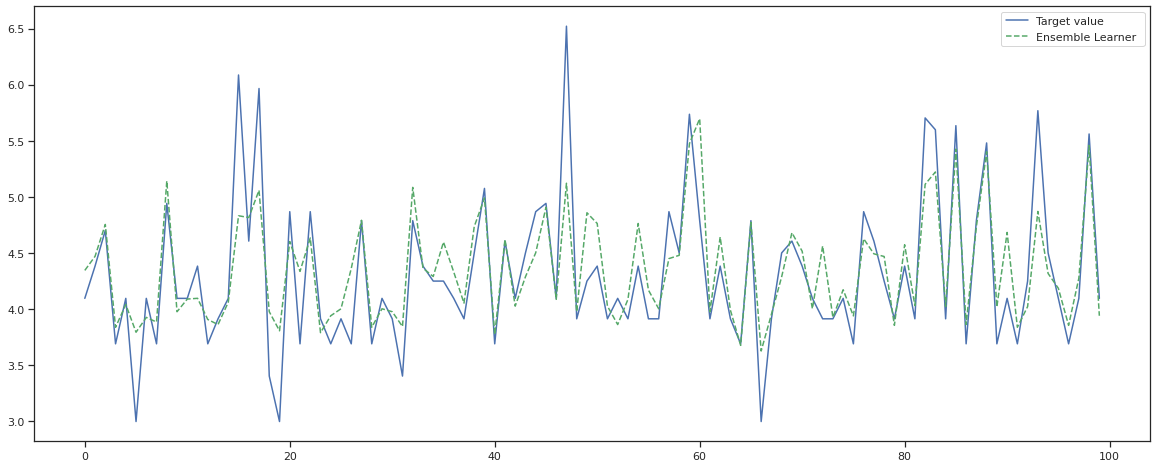

In [55]:
fig = plt.figure(figsize=(20,8))
plt.plot(y_test[:100].values,label='Target value',color='b')
plt.plot(y1_pred[:100],label='Ensemble Learner ', linestyle='--', color='g')

plt.legend(loc=1)

Here we have two values; target value and the predicted value.

In [59]:
# save the file for deployment

import pickle
file = open('EnsembleModel.pkl','wb')
pickle.dump(Ensemble_model,file)
file.close()